In [1]:
##################################
#The notebook needed
%matplotlib inline 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#!/usr/bin/env python
# coding: utf-8
import os
import sys
sys.path.append("/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/OASIS-master/")

from oasis.functions import deconvolve

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
from importlib import reload  # Python 3.4+ only.
        
import pickle
import numpy, scipy.io
# import scipy.optimize as sop
# from autograd import elementwise_grad as egrad
# from mpl_toolkits.mplot3d import Axes3D
# import sklearn.discriminant_analysis as skd
# import autograd.scipy.special as ssp
# from autograd import jacobian

import size_contrast_analysis as sca
import scipy.stats as sst
from sim_utils import *
import pyute as ut
#reload(utils)
# make output path 
outputDir='./Output/'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)
    
    
# paths
dsbase = '/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/'







# dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l23','sst_l23','vip_l23']]


In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/

/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/OASIS-master/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
pwd

'/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv'

In [3]:
#######################
#parameters

nsize,ncontrast = 5,6
to_exclude = ['session_'+exptname for exptname in ['180714_M9053','180321_M7955', '180519_M8959', '180531_M8961',\
                                                   '180618_M8956','190202_M10075', '190620_M10619','200103_M0388']]

#######################
#Files to analyze


for lt in [True]:

#     if lt:
#         dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23']]
#     else:
    dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','pv_l23','sst_l23','vip_l23']]




    ncelltypes = len(dsnames)
    selection = [None for itype in range(ncelltypes)]
    for itype in range(ncelltypes):
        with ut.hdf5read(dsnames[itype]) as ds:
            keylist = list(ds.keys())
            nexpt = len(keylist)
            to_keep = np.array([k not in to_exclude for k in keylist])
            selection[itype] = np.arange(nexpt)[to_keep]


    
    for pval_cutoff in [0.05]:

        for ct in np.array([11]):
            ctr_cutoff = ct

            #########################################################
            #########################################################
            # Run

            rs =gen_rs(dsnames=dsnames,selection=selection,dcutoff=ctr_cutoff,pval_cutoff=pval_cutoff,slices=None,running=lt)
            #r_spatial=gen_rspatial(dsnames=dsnames,selection=selection,dcutoffs=[0,5,10,15],pval_cutoff=pval_cutoff,slices=None,datafield='decon')
            #########################################################
            paramstring='-running_'+str(lt)+'-pval_cutoff_'+str(pval_cutoff)+'-ctrcutoff_'+str(ctr_cutoff)
            #########################################################   
            #########################################################
            def sum_to_1(r):
                R = r.reshape((r.shape[0],-1))
                R = R/np.nansum(R,axis=1)[:,np.newaxis]
                return R

            RsFlatten = [[None,None] for i in range(len(rs))]

            for iR,r in enumerate(rs):
                for ialign in range(2):
                    RsFlatten[iR][ialign] = sum_to_1(r[ialign])
            #########################################################
            #########################################################
            #Save RsFlatten

            with open(outputDir+'RsFlatten'+paramstring+'.pickle', 'wb') as handle:
                pickle.dump(RsFlatten, handle, protocol=pickle.HIGHEST_PROTOCOL)

            scipy.io.savemat(outputDir+'RsFlatten'+paramstring+'.mat', mdict={'RsFlatten': RsFlatten})            

            #########################################################
            #De flatten Rs
            Rs=np.zeros_like(rs)
            for k in range(len(dsnames)): # this is the number of files we have
                for l in range(1): #This is locomotion/ no locomotions
                    ncells=RsFlatten[k][l].shape[0]
                    Rs[k][l]=np.reshape(RsFlatten[k][l], (ncells,5, 6)) 


            with open(outputDir+'Rs'+paramstring+'.pickle', 'wb') as handle:
                pickle.dump(RsFlatten, handle, protocol=pickle.HIGHEST_PROTOCOL)

            scipy.io.savemat(outputDir+'Rs'+paramstring+'.mat', mdict={'Rs': Rs})            




/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190202_M10075" (9 members)>
decon
0.39652777777777776
<HDF5 group "/session_190304_M10077" (9 members)>


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


decon
0.44027777777777777


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (9 members)>
decon
0.8590277777777777


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190620_M10616" (9 members)>
decon
0.4568452380952381


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (9 members)>
decon
0.3993055555555556
<HDF5 group "/session_190624_M10615" (8 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.9176587301587301


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190627_M10616" (9 members)>
decon
0.2123015873015873
<HDF5 group "/session_190701_M10615" (8 members)>
decon
0.3308531746031746
<HDF5 group "/session_191212_M0762" (8 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.17807539682539683
/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285
<HDF5 group "/session_181209_M8536" (9 members)>
decon
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (9 members)>
decon
0.05277777777777778
<HDF5 group "/session_190130_M9667" (9 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.8097222222222222


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190131_M9355" (9 members)>
decon
0.06597222222222222
<HDF5 group "/session_190208_M9355" (9 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.049305555555555554
<HDF5 group "/session_190212_M8536" (9 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.7534722222222222


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_191002_M0293" (8 members)>
decon
0.15376984126984128
<HDF5 group "/session_191108_M0403" (8 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.002976190476190476
/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/pv_l23_data_struct.hdf5
<HDF5 group "/session_191105_M0589" (12 members)>
decon


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


0.0
<HDF5 group "/session_191220_M0589" (12 members)>
decon
0.000496031746031746


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_191229_M0892" (12 members)>
decon
0.000496031746031746
<HDF5 group "/session_200102_M0892" (12 members)>
decon
0.06498015873015874
<HDF5 group "/session_200108_M0891" (12 members)>
decon
0.13938492063492064
<HDF5 group "/session_200620_M0891" (13 members)>
decon
0.5545634920634921


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_200621_M0893" (13 members)>
decon
0.4722222222222222


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (9 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
decon
0.8441666666666666


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (9 members)>
decon
0.1475
<HDF5 group "/session_181117_M10039" (9 members)>
decon
0.21071428571428572
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
<HDF5 group "/session_191224_M0390" (11 members)>
decon
0.05952380952380952
/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/Data/RawData/DataLatest/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (8 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_180516_M8956" (9 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
decon
0.6616666666666666


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (9 members)>
decon
0.6375


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/pyute.py:1069: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (9 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333
<HDF5 group "/session_180903_M8961" (9 members)>
decon
0.8341666666666666


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:62: RuntimeWarning: invalid value encountered in less
  rf_conditions = [ut.k_and(~np.isnan(X[:,0]),~np.isnan(y[:,0])),sqerror<0.75,sigma>3.3,pval[ikey]<0.1]


<HDF5 group "/session_190710_M0208" (9 members)>
decon
0.27628968253968256
<HDF5 group "/session_191215_M0385" (9 members)>
decon
0.18998015873015872
<HDF5 group "/session_200103_M0388" (9 members)>
decon
0.08085317460317461


/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:163: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/Users/agos/Dropbox/ColumbiaProjects/Data_NewDanFitting/DataAnalysis_Responses_Submitted_BiorXiv/sim_utils.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.nanmean(np.nanmean(arr[slicer],-1),-1)
/Users/agos/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


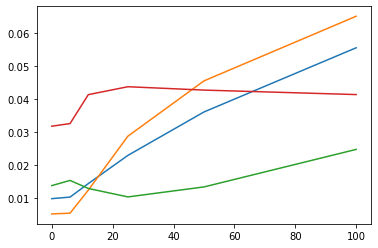

In [6]:

ucontrast=[0,6,12,25,50,100]

for k in range(4):
        plt.plot(ucontrast,np.nanmean(Rs[k+1][0][:,0,:],0).transpose())
#         plt.plot(np.nanmean(rs_stationay[k+1][0][:,0,:],0))


